In [25]:
#IMPORTAMOS LAS LIBRERIAS QUE VAMOS A TRABAJAR
import pandas as pd #PANDAS ES PARA MANIPULAR LOS DATOS
import numpy as np  #NUMPY ES PARA HACER CALCULO ENTRE MATRICES
import matplotlib   #PA GRAFICAR
import matplotlib.pyplot as plt 
from scipy import stats  #PARA SACAR LAS ESTADISTICAS, R2, PRUEBAS, ETC.
import seaborn as sns; sns.set() #PARA CREAR PLOTS
from sklearn import datasets #SKLEARN CONTIENE LOS ALGORITMOS DE MACHINE LEARNING, EN ESTE CASO EL MODULO DE DATASETS CONTENDRÁ LOS DATOS QUE USAREMOS

In [26]:
#EL PRIMER PASO ES CARGAR LOS DATOS, EN ESTE CASO USAREMOS UNOS DATOS DE LA LIBRERIA SKLEARN POR ESO USAMOS EL .LOAD_BREAST_(NOMBRE DE LOS DATOS)
cancer = datasets.load_breast_cancer()
cancer #EN CASO DE NO USAR ESTOS DATOS, DEBEMOS USAR PANDAS PARA IMPORTAR LOS DATOS .JSON, .XSLX, .CVS, DE LA WEB, API, SQL

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [27]:
#SEGUNDO PASO, VAMOS HA REALIZAR TOdO EL ANALISIS VISUAL, PARA VER SI LOS DATOS NECESITAN SER PREPROCESADOS, ETC.
cancer.feature_names #Estamos viendo las etiquetas

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
cancer.target_names #estamos viendo el nombre de las variables objetivo

array(['malignant', 'benign'], dtype='<U9')

In [24]:
cancer.data.shape #estamos viendo la forma de los datos

(569, 30)

In [21]:
#LA MEJOR FORMA DE VISUALIZAR LOS DATOS ES CREANDO UN DATAFRAME, PARA PRIMERO ALMACENARLOS, SEGUNDO PARA QUE SE VEA MAS ORGANIZADO
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
# ESTAMOS CREANDO UN DATAFRAME ENTONCES LO PRIMERO pd.DataFrame es el comando para almacenarlo con np.c_estamos diciendo de donde coja losdatos y qye datos cojer, con columns= np.append estammso diciendole vem¿nga coja las etiquetas y los nombres de estas y armeme el data frame
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

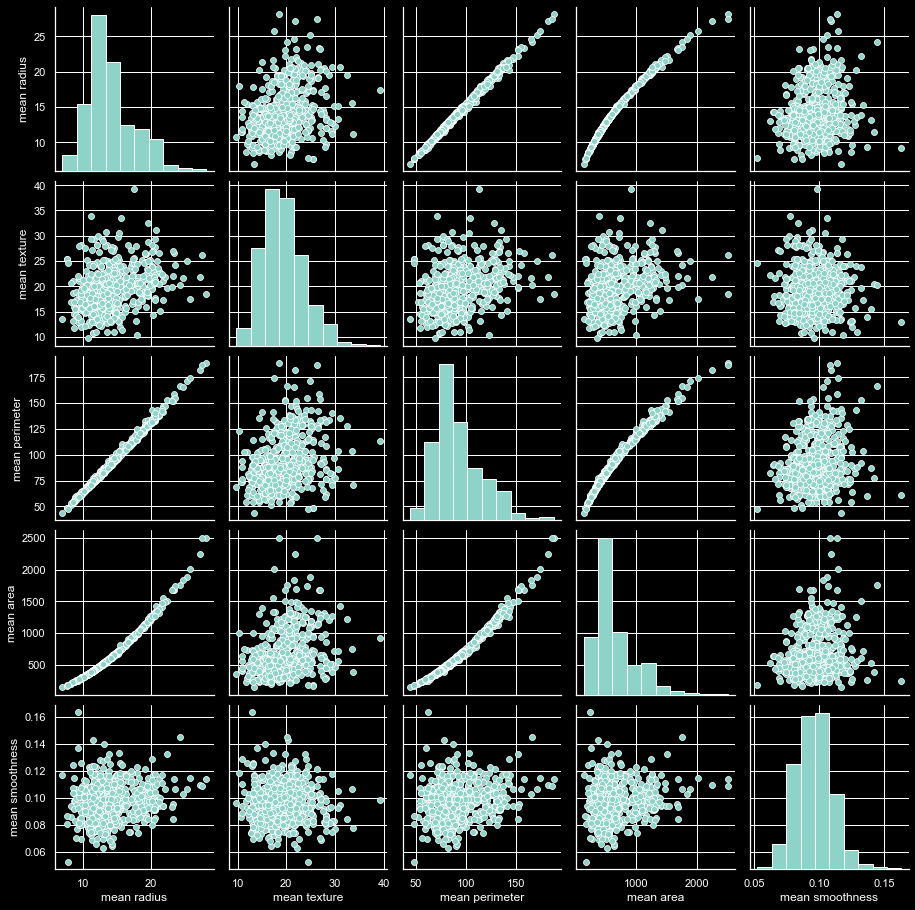

In [66]:
plt.style.use("dark_background")
sns.pairplot(df, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] ) #SNS es como una especie de matplolip, acá lo que haremos es ver la relacion entre nuestras variable

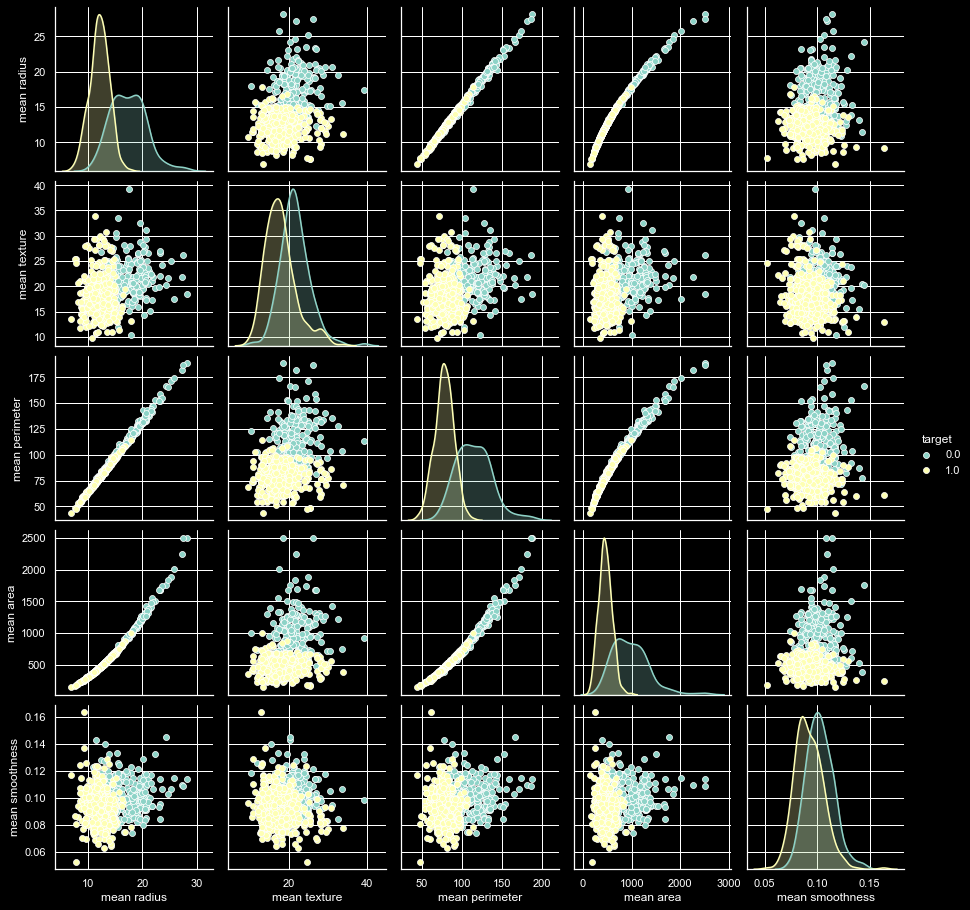

In [74]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] ) #SNS es como una especie de matplolip, acá lo que haremos es ver la relacion entre nuestras variable
#Con Hue estamos creando las etiquetas por decirlo asi, naranja benigno, azul maligno

In [30]:
df['target'].value_counts() #Listo, despues de los plots vemos cuantos datos hay de cada variable 1.0 benigno 0 maligno 

1.0    357
0.0    212
Name: target, dtype: int64

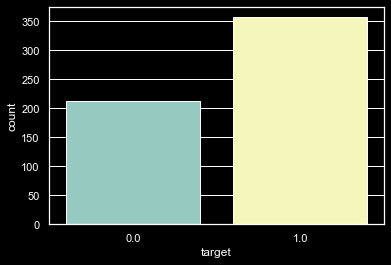

In [73]:
sns.countplot(df['target'], label = "Count") #graficamos los datos para ver si son omgeneos en el numero de tumores benignos y el numero de malignos, esto con haras de ver si necesitan ser tratados, label es la etiqueta del grafico

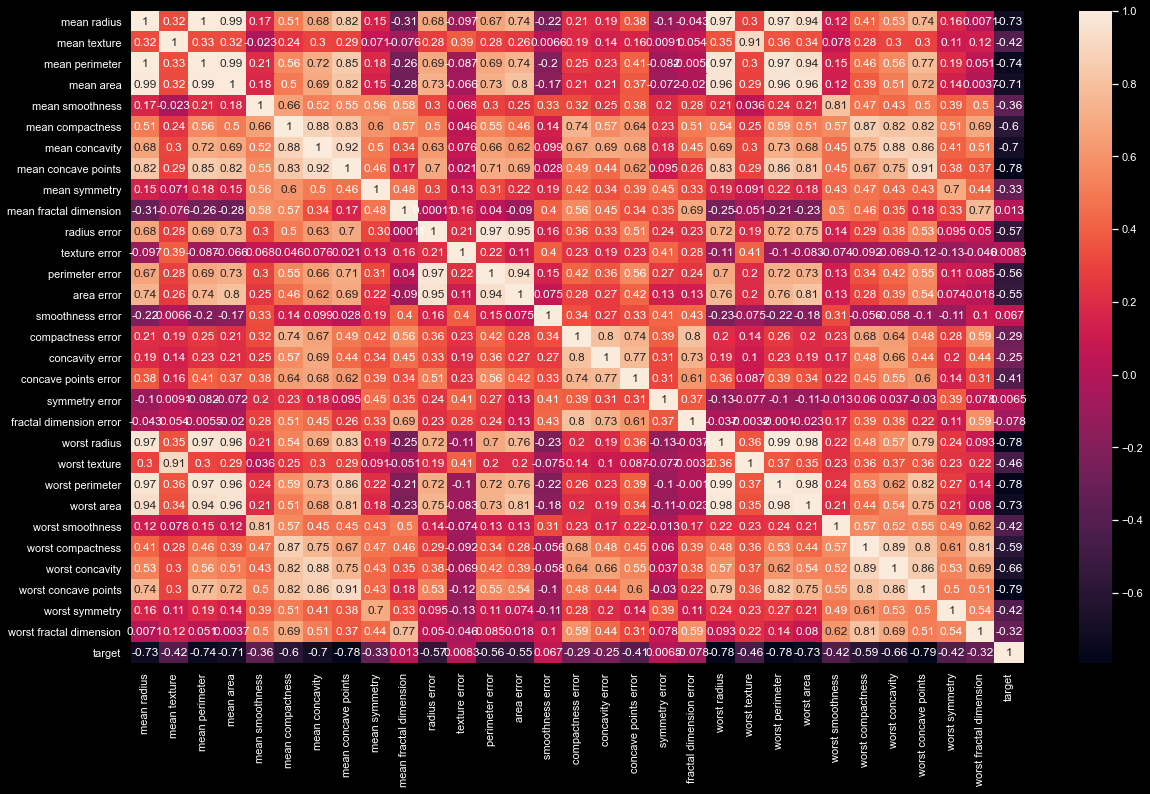

In [70]:
#vemos que los datos no son homgeneos, entonces haremos unas correcciones, pero antes para estar seguros haremos la matriz de correlacion
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(), annot=True) #hacemos la matriz de correlacion
##Hasta acá va el procesamiento visual de datos###

In [40]:
#Como ya sabemos nuestros datos nos hablan de tumores benignos y malignos, entonces lo que vamos ha hacer es definir las variables, para poder arreglar los datos con machine learning
#vamos a definir las variables, para luego entrenarlo
x = cancer.data #Estamos diciendo coja los satos para x
#Para y utilizaremos los datos de las etiquetas
y= cancer.target #y aca le decimos coja los datos de benigno o maligno, que a la larga es lo que queremos averiguar, la probabilidad de que una persona que tiene un tumor, este le resulte benigno o maligno
# 1 el tumor es maligno 0el tumor es benigno
print("los datos de X son:",x), print("los datos de Y son:", y)

los datos de X son: [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
los datos de Y son: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 

(None, None)

In [41]:
## BUENO COMO SABEMOS QUE LOS DATOS ESTAN UNIDOS Y QUEREMOS SEPARARLO EN VARIABLES DE ENTRENAMIENTO Y EVALUACION IMPORTAREMOS LA LIBRERIA QUE NOS PERMITE HACER ESO###
from sklearn.model_selection import train_test_split
#ahora lo que haremos es separar los datos en entrenamiento (train) y en evaluacion(test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20) #el 0.2 es que le estamos diciendo al programa del conjunto de datos que le estoy dando el 20% sera para que me evalue el modelo, el random es que coja aleatoriamente los datos

In [42]:
#como ya lo habiamos dicho datos no tienen las mismas magnitudes, lo mejor es que los escalemos, escalar es que los pongamos en las mismas condiciones, es decir vamos a normalizar nuestra base de datos, eso lo haremos con sklearn
from sklearn.preprocessing import StandardScaler #con .preprocessing tendremos las herramientas para arreglar los datos
escalar = StandardScaler()
x_train = escalar.fit_transform(x_train) #con .fit_transform transformaremos los datos, con .fit solo es para entrenar el modelo
x_test = escalar.transform(x_test)
#definimos el modelo a utilizar

In [46]:
#bueno como ya definimos que mi modelo sera 0=tumor benigno 1=tumor maligno es un modelo de clasificacion, entonces vamos a implementar un modelo de regresion logistica
from sklearn.linear_model import LogisticRegression 
Logic = LogisticRegression()
#ya con el modelo definido lo que haremos ahora es usar el conjunto de datos de entrenamiento para ajustar el modelo
Logic.fit(x_train, y_train)


LogisticRegression()

In [47]:
#corremos el modelo para hacer una prediccion
y_pred = Logic.predict(x_test)

In [48]:
#vemos los datos, posterior a esto haremos los examenes de precision
y_pred, y_test


(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1]),
 array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1]))

In [52]:
#Ahora calcularemos la probabilidad
y_prob = Logic.predict_proba(x_test)

In [53]:
y_prob

array([[4.46306122e-04, 9.99553694e-01],
       [2.64394408e-01, 7.35605592e-01],
       [9.99999945e-01, 5.46431745e-08],
       [1.25635265e-02, 9.87436474e-01],
       [9.97458439e-01, 2.54156092e-03],
       [9.99999997e-01, 2.59178491e-09],
       [9.99996538e-01, 3.46187046e-06],
       [3.52008194e-02, 9.64799181e-01],
       [9.29914817e-04, 9.99070085e-01],
       [1.00000000e+00, 3.40664920e-13],
       [9.99090381e-01, 9.09619062e-04],
       [4.88734792e-04, 9.99511265e-01],
       [2.75475068e-02, 9.72452493e-01],
       [9.99997590e-01, 2.40983746e-06],
       [1.25453756e-01, 8.74546244e-01],
       [2.13706145e-02, 9.78629385e-01],
       [4.13057978e-04, 9.99586942e-01],
       [8.88956965e-01, 1.11043035e-01],
       [9.97086566e-01, 2.91343409e-03],
       [6.32822265e-04, 9.99367178e-01],
       [1.33035578e-02, 9.86696442e-01],
       [1.31095647e-05, 9.99986890e-01],
       [9.68639710e-01, 3.13602897e-02],
       [9.96212067e-01, 3.78793273e-03],
       [9.999947

In [54]:
#verifico lo anterior con la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred, labels=[1,0])
matriz1= pd.DataFrame(matriz, index=['tiene_cancer', 'esta_sano'],
                         columns=['predicted_cancer','predicted_healthy'])
matriz1 #wueno los resultados se interpretan así: en la diagonal principal, son los datos que se han predicho correctamente, en la diagonal secundaria los que presentaron errores, se deben sumar para saber el total

predicted_cancer  predicted_healthy
tiene_cancer                66                  0
esta_sano                    1                 47

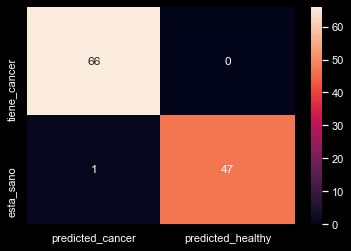

In [68]:
plt.style.use("dark_background")
sns.heatmap(matriz1, annot=True)

In [56]:
#otros métodos de precisión
from sklearn.metrics import precision_score
precision =precision_score(y_test, y_pred)
precision

0.9850746268656716

In [57]:
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
exactitud

0.9912280701754386

In [58]:
from sklearn.metrics import recall_score
sensibilidad= recall_score(y_test, y_pred)
sensibilidad

1.0

In [59]:
#calculamos el F1 que es la combinacion de la sensibilidad y la exactitud
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
puntajef1

0.9924812030075187

In [60]:
#calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test, y_pred)
roc_auc #Acá la metrica mas importante o relevante o bueno la que podemos usar es la curva ROC-AUC ó el F1


0.9895833333333333